Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Strojno učenje 1 2022/2023  
http://www.fer.unizg.hr/predmet/struce1

------------------------------

### Druga laboratorijska vježba: Linearni diskriminativni modeli i logistička regresija

*Verzija: 1.1 (ispravljena greška u tekstu prvog zadatka)  
Zadnji put ažurirano: 1. 10. 2021.*

(c) 2015-2022 Jan Šnajder, Domagoj Alagić  

Rok za predaju: **6. studenog 2022. u 23:59h**

------------------------------

### Upute

Druga laboratorijska vježba sastoji se od šest zadataka. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [595]:
# Učitaj osnovne biblioteke...
import sklearn
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['poly']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [596]:
def plot_2d_clf_problem(X, y, h=None):
    '''
    Plots a two-dimensional labeled dataset (X,y) and, if function h(x) is given, 
    the decision surfaces.
    '''
    assert X.shape[1] == 2, "Dataset is not two-dimensional"
    if h!=None : 
        # Create a mesh to plot in
        r = 0.04  # mesh resolution
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, r),
                             np.arange(y_min, y_max, r))
        XX=np.c_[xx.ravel(), yy.ravel()]
        try:
            Z_test = h(XX)
            if Z_test.shape == ():
                # h returns a scalar when applied to a matrix; map explicitly
                Z = np.array(list(map(h,XX)))
            else :
                Z = Z_test
        except ValueError:
            # can't apply to a matrix; map explicitly
            Z = np.array(list(map(h,XX)))
        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, cmap=plt.cm.Pastel1)

    # Plot the dataset
    plt.scatter(X[:,0],X[:,1], c=y, cmap=plt.cm.tab20b, marker='o', s=50);

### 1. Linearna regresija kao klasifikator

U prethodnoj laboratorijskoj vježbi koristili smo model linearne regresije za, naravno, regresiju. Međutim, model linearne regresije može se koristiti i za **klasifikaciju**. Iako zvuči pomalo kontraintuitivno, zapravo je dosta jednostavno. Naime, cilj je naučiti funkciju $f(\mathbf{x})$ koja za pozitivne primjere predviđa vrijednost $1$, dok za negativne primjere predviđa vrijednost $0$. U tom slučaju, funkcija $f(\mathbf{x})=0.5$ predstavlja granicu između klasa, tj. primjeri za koje vrijedi $h(\mathbf{x})\geq 0.5$ klasificiraju se kao pozitivni, dok se ostali klasificiraju kao negativni.

Klasifikacija pomoću linearne regresije implementirana je u razredu [`RidgeClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html). U sljedećim podzadatcima **istrenirajte** taj model na danim podatcima i **prikažite** dobivenu granicu između klasa. Pritom isključite regularizaciju ($\alpha = 0$, odnosno `alpha=0`). Također i ispišite **točnost** vašeg klasifikacijskog modela (smijete koristiti funkciju [`metrics.accuracy_score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)). Skupove podataka vizualizirajte korištenjem pomoćne funkcije ``plot_clf_problem(X, y, h=None)`` koja je dana na početku ove bilježnice. `X` i `y` predstavljaju ulazne primjere i oznake, dok `h` predstavlja funkciju predikcije modela (npr. `model.predict`). 

U ovom zadatku cilj je razmotriti kako se klasifikacijski model linearne regresije ponaša na linearno odvojim i neodvojivim podatcima.

In [597]:
from sklearn.linear_model import LinearRegression, RidgeClassifier
from sklearn.metrics import accuracy_score

### (a)

Prvo, isprobajte *ugrađeni* model na linearno odvojivom skupu podataka `seven` ($N=7$).

In [598]:
seven_X = np.array([[2,1], [2,3], [1,2], [3,2], [5,2], [5,4], [6,3]])
seven_y = np.array([1, 1, 1, 1, 0, 0, 0])

Točnost klasifikacijskog modela: 1.0 


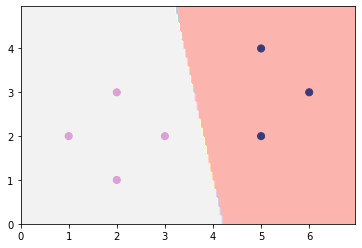

In [599]:
clas = RidgeClassifier(alpha=0).fit(seven_X, seven_y)
prediction_y = clas.predict(seven_X)
print(f"Točnost klasifikacijskog modela: {accuracy_score(seven_y, prediction_y)} ")
plot_2d_clf_problem(seven_X, seven_y, h=clas.predict)

Kako bi se uvjerili da se u isprobanoj implementaciji ne radi o ničemu doli o običnoj linearnoj regresiji, napišite kôd koji dolazi do jednakog rješenja korištenjem isključivo razreda [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). Funkciju za predikciju, koju predajete kao treći argument `h` funkciji `plot_2d_clf_problem`, možete definirati lambda-izrazom: `lambda x : model.predict(x) >= 0.5`.

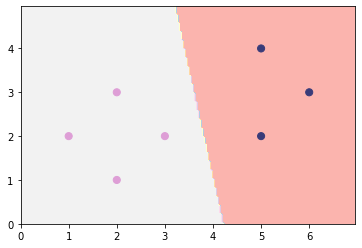

In [600]:
linear_regression = LinearRegression().fit(seven_X, seven_y)
h = lambda x : linear_regression.predict(x) >= 0.5
plot_2d_clf_problem(seven_X, seven_y, h)

**Q:** Kako bi bila definirana granica između klasa ako bismo koristili oznake klasa $-1$ i $1$ umjesto $0$ i $1$?

### (b)  

Probajte isto na linearno odvojivom skupu podataka `outlier` ($N=8$):

In [601]:
outlier_X = np.append(seven_X, [[12,8]], axis=0)
outlier_y = np.append(seven_y, 0)

Točnost klasifikacijskog modela: 0.875 


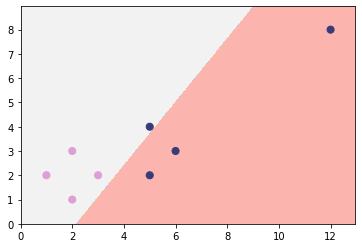

In [602]:
clas = RidgeClassifier(alpha=0).fit(outlier_X, outlier_y)
prediction_y = clas.predict(outlier_X)
print(f"Točnost klasifikacijskog modela: {accuracy_score(outlier_y, prediction_y)} ")
plot_2d_clf_problem(outlier_X, outlier_y, h=clas.predict)

**Q:** Zašto model ne ostvaruje potpunu točnost iako su podatci linearno odvojivi?

### (c)  

Završno, probajte isto na linearno neodvojivom skupu podataka `unsep` ($N=8$):

In [603]:
unsep_X = np.append(seven_X, [[2,2]], axis=0)
unsep_y = np.append(seven_y, 0)

Točnost klasifikacijskog modela: 0.875 


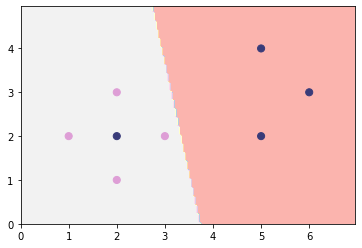

In [604]:
clas = RidgeClassifier(alpha=0).fit(unsep_X, unsep_y)
prediction_y = clas.predict(unsep_X)
print(f"Točnost klasifikacijskog modela: {accuracy_score(unsep_y, prediction_y)} ")
plot_2d_clf_problem(unsep_X, unsep_y, h=clas.predict)

**Q:** Očito je zašto model nije u mogućnosti postići potpunu točnost na ovom skupu podataka. Međutim, smatrate li da je problem u modelu ili u podacima? Argumentirajte svoj stav.

### 2. Višeklasna klasifikacija

Postoji više načina kako se binarni klasifikatori mogu se upotrijebiti za višeklasnu klasifikaciju. Najčešće se koristi shema tzv. **jedan-naspram-ostali** (engl. *one-vs-rest*, OVR), u kojoj se trenira po jedan klasifikator $h_j$ za svaku od $K$ klasa. Svaki klasifikator $h_j$ trenira se da razdvaja primjere klase $j$ od primjera svih drugih klasa, a primjer se klasificira u klasu $j$ za koju je $h_j(\mathbf{x})$ maksimalan.

Pomoću funkcije [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) generirajte slučajan dvodimenzijski skup podataka od tri klase i prikažite ga koristeći funkciju `plot_2d_clf_problem`. Radi jednostavnosti, pretpostavite da nema redundantnih značajki te da je svaka od klasa "zbijena" upravo u jednu grupu.

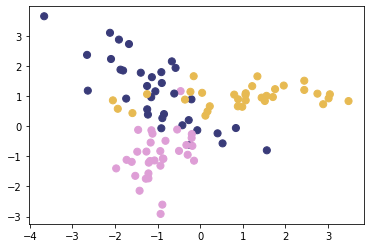

In [605]:
from sklearn.datasets import make_classification
X, y = make_classification(n_features=2,n_redundant=0, n_classes=3, n_clusters_per_class=1 )
plot_2d_clf_problem(X,y)

Trenirajte tri binarna klasifikatora, $h_1$, $h_2$ i $h_3$ te prikažite granice između klasa (tri grafikona). Zatim definirajte $h(\mathbf{x})=\mathrm{argmax}_j h_j(\mathbf{x})$  (napišite svoju funkciju `predict` koja to radi) i prikažite granice između klasa za taj model. Zatim se uvjerite da biste identičan rezultat dobili izravno primjenom modela `RidgeClassifier`, budući da taj model za višeklasan problem zapravo interno implementira shemu jedan-naspram-ostali.

**Q:** Alternativna shema jest ona zvana **jedan-naspram-jedan** (engl, *one-vs-one*, OVO). Koja je prednost sheme OVR nad shemom OVO? A obratno?

In [606]:
def predict(x):
  h1 = linear_regression_h1.predict(x.reshape(1,-1))
  h2 = linear_regression_h2.predict(x.reshape(1,-1))
  h3 = linear_regression_h3.predict(x.reshape(1,-1))
  return np.argmax([h1,h2,h3])

y = [1 1 1 1 2 0 0 0 2 1 1 2 2 0 0 1 0 1 2 0 2 0 2 0 2 0 2 0 1 2 2 2 2 1 2 0 0
 0 2 1 0 0 0 0 2 1 0 1 2 0 1 2 0 1 1 0 1 1 2 1 0 2 2 2 0 2 0 0 2 0 0 1 2 0
 2 1 1 2 1 1 1 2 1 1 0 2 0 0 0 1 1 2 1 1 1 0 2 2 1 2]
y_h1 = [0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
y_h2 = [1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0]
y_h3 = [0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 

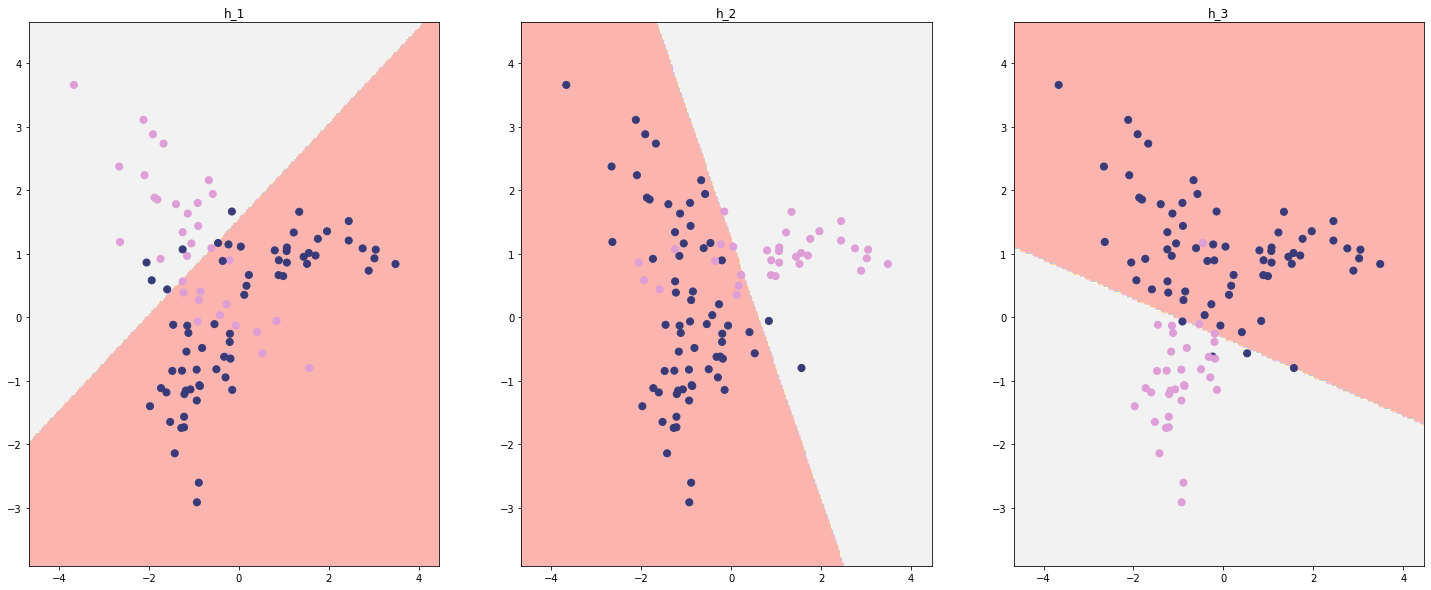

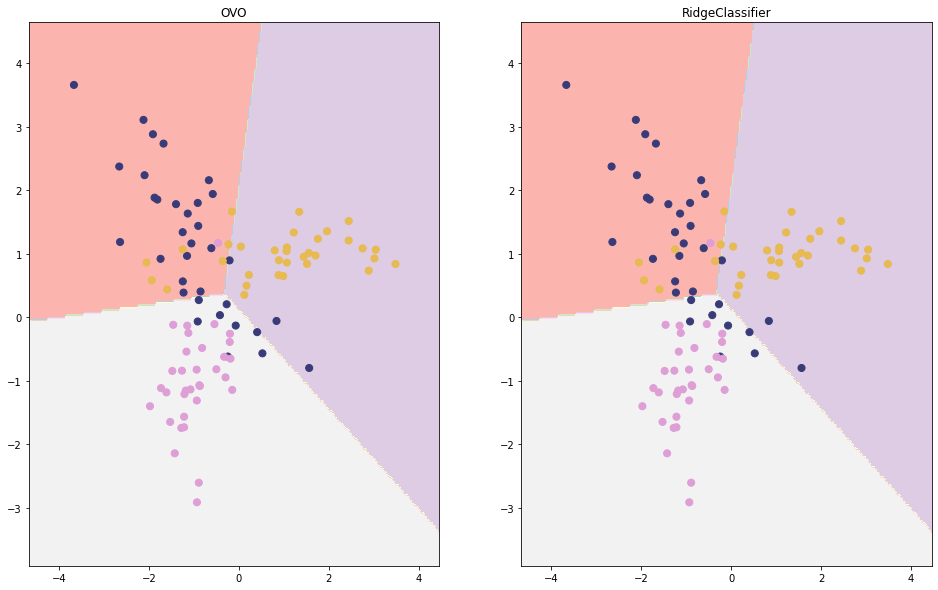

In [607]:
print(f"y = {y}")

y_h1 = [1 if pr==0 else 0 for pr in y]
print(f"y_h1 = {y_h1}")
y_h2 = [1 if pr==1 else 0 for pr in y]
print(f"y_h2 = {y_h2}")
y_h3 = [1 if pr==2 else 0 for pr in y]
print(f"y_h3 = {y_h3}")

linear_regression_h1= LinearRegression().fit(X, y_h1)
linear_regression_h2= LinearRegression().fit(X, y_h2)
linear_regression_h3= LinearRegression().fit(X, y_h3)

plt.figure(figsize=(25,10))
plt.subplot(131)
plt.title("h_1")
plot_2d_clf_problem(X, y_h1, h=lambda x: linear_regression_h1.predict(x)>=0.5)
plt.subplot(132)
plt.title("h_2")
plot_2d_clf_problem(X, y_h2, h=lambda x: linear_regression_h2.predict(x)>=0.5)
plt.subplot(133)
plt.title("h_3")
plot_2d_clf_problem(X, y_h3, h=lambda x: linear_regression_h3.predict(x)>=0.5)
plt.show()

plt.figure(figsize=(25,10))
plt.subplot(131)
plt.title("OVO")
plot_2d_clf_problem( X, y, h=predict)
plt.subplot(132)
plt.title("RidgeClassifier")
clas = RidgeClassifier(alpha=0).fit(X, y)
prediction_y = clas.predict(X)
plot_2d_clf_problem(X, y, h=clas.predict)
plt.show()

### 3. Logistička regresija

Ovaj zadatak bavi se probabilističkim diskriminativnim modelom, **logističkom regresijom**, koja je, unatoč nazivu, klasifikacijski model.

Logistička regresija tipičan je predstavnik tzv. **poopćenih linearnih modela** koji su oblika: $h(\mathbf{x})=f(\mathbf{w}^\intercal\tilde{\mathbf{x}})$. Logistička funkcija za funkciju $f$ koristi tzv. **logističku** (sigmoidalnu) funkciju $\sigma (x) = \frac{1}{1 + \textit{exp}(-x)}$.

### (a)  

Definirajte logističku (sigmoidalnu) funkciju $\mathrm{sigm}(x)=\frac{1}{1+\exp(-\alpha x)}$ i prikažite je za $\alpha\in\{1,2,4\}$.

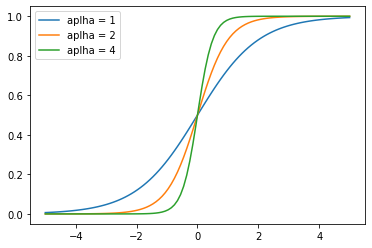

In [608]:
def sigm(x_alpha):
  return np.power(1+exp(-x_alpha), -1)

#plot
x= np.linspace(-5,5,100)

for i,alpha in enumerate([1,2,4]):
  plt.plot(x, sigm(alpha*x), label=f"aplha = {alpha}")

plt.legend(loc="best")
plt.show()

**Q**: Zašto je sigmoidalna funkcija prikladan izbor za aktivacijsku funkciju poopćenoga linearnog modela? 
</br>

**Q**: Kakav utjecaj ima faktor $\alpha$ na oblik sigmoide? Što to znači za model logističke regresije (tj. kako izlaz modela ovisi o normi vektora težina $\mathbf{w}$)?

### (b) 

Implementirajte funkciju 

> `lr_train(X, y, eta=0.01, max_iter=2000, alpha=0, epsilon=0.0001, trace=False)` 

za treniranje modela logističke regresije gradijentnim spustom (*batch* izvedba). Funkcija uzima označeni skup primjera za učenje (matrica primjera `X` i vektor oznaka `y`) te vraća $(n+1)$-dimenzijski vektor težina tipa `ndarray`. Ako je `trace=True`, funkcija dodatno vraća listu (ili matricu) vektora težina $\mathbf{w}^0,\mathbf{w}^1,\dots,\mathbf{w}^k$ generiranih kroz sve iteracije optimizacije, od 0 do $k$. Optimizaciju treba provoditi dok se ne dosegne `max_iter` iteracija, ili kada razlika u pogrešci unakrsne entropije između dviju iteracija padne ispod vrijednosti `epsilon`. Parametar `alpha` predstavlja faktor L2-regularizacije.

Preporučamo definiranje pomoćne funkcije `lr_h(x,w)` koja daje predikciju za primjer `x` uz zadane težine `w`. Također, preporučamo i funkciju `cross_entropy_error(X,y,w)` koja izračunava pogrešku unakrsne entropije modela na označenom skupu `(X,y)` uz te iste težine.

**NB:** Obratite pozornost na to da je način kako su definirane oznake ($\{+1,-1\}$ ili $\{1,0\}$) kompatibilan s izračunom funkcije gubitka u optimizacijskome algoritmu.

In [609]:
from numpy import linalg
from sklearn.preprocessing import PolynomialFeatures

def sigm(Wx):
  return np.power(1+exp(-Wx), -1)

def lr_h(x,w):
    #predikcija za primjer x uz zadanu težinu w
    return sigm(np.dot(x,w))

def cross_entropy_loss(y,x,w, alpha):
    #gubitak unakrsne entropije
    return -y* np.log(lr_h(x,w)) - (1-y) * np.log(1-lr_h(x,w))

def cross__entropy_error(X,y,w, alpha=0):
    #izračunava pogrešku unakrsne entropije modela na označenom skupu (X,y)
    N= X.shape[0] #broj primjera
      #np.log is ln, np.log10 is standard
    E = [cross_entropy_loss(y[i], X[i], w, alpha) for i,val in enumerate(X)]
    E = sum(E)
    return (1/N)*E #+ 0.5*alpha*(np.dot(w, w.T))

def lr_train(X, y, eta=0.01, max_iter=2000, alpha=0, epsilon=0.0001, trace=False):

    #dobivanje dummy 1
    poly = PolynomialFeatures(1)
    theta = poly.fit_transform(X)

    #1: w <- (0,0,...,0)
    w = np.zeros((theta.shape[1]))
    if trace:
      #w.shape[0]=3
      wk = np.zeros((w.shape[0]))

    num_iterations = 0
    last_error = 0
    error = 0
    
    #2: ponavljaj do konvergencije
    while num_iterations < max_iter:
        num_iterations += 1  

        #3: delta_w0 <- 0
        #4: delta_w <- (0,0,...,0)
        delta_w0 = 0

        last_error = cross__entropy_error(theta, y, w, alpha=alpha)

        delta_w = np.zeros(w.shape)
        
        #5: za i=1...N
        for i, val in enumerate(theta):      
            #6: h <- sigm(W.T*theta)
            h = lr_h(theta[i], w)
            #7 delta_w0 <- -(h-y)
            #6: delta_w <- -(h-y)*sigm
            delta_w0 = delta_w0 + (h - y[i])
            delta_w = delta_w + (h - y[i])*val
  
        #0: w_0 <- w_0 + eta* delta_w0
        #10: w <- w*(1-n*lambda(aplha)) + eta* delta_w
        # wo - prvi element w azuriranje
        w[0] = w[0] - eta*delta_w0
        # w[1:] - svi ostali elementi w azuriranje
        w[1:] = w[1:]*(1-(eta*alpha)) - eta*delta_w[1:]
        
        if trace:
          wk = np.vstack((wk,w))

        error = cross__entropy_error(theta , y, w, alpha=alpha)
        
        if abs(last_error - error) < epsilon:
            print(f"Error: iteracija prekinuta u {num_iterations} koraku\n")
            break

    if trace:
        #Ako je trace=True, funkcija dodatno vraća listu (ili matricu) vektora težin
        return wk
    else:
        return w

### (c)

Koristeći funkciju `lr_train`, trenirajte model logističke regresije na skupu `seven`, prikažite dobivenu granicu između klasa te  izračunajte pogrešku unakrsne entropije. 

**NB:** Pripazite da modelu date dovoljan broj iteracija.

In [610]:
seven_X = np.array([[2,1], [2,3], [1,2], [3,2], [5,2], [5,4], [6,3]])
seven_y = np.array([1, 1, 1, 1, 0, 0, 0])

Error: iteracija prekinuta u 947 koraku

w = [ 4.45449454 -1.71089242  0.68413507]

Pogreška unakrsne entropije = 0.13521872720206743



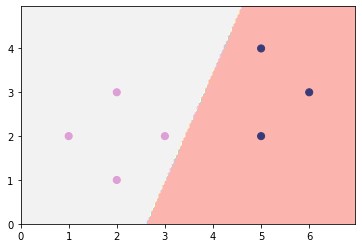

In [611]:
w = lr_train(seven_X, seven_y)
print(f"w = {w}\n")


def h(X):
    #matrica dizajna
    poly = PolynomialFeatures(1)
    theta = poly.fit_transform(X)
    
    #napravi procjenu za svaki primjer iz theta na osnovu dobivenog w
    y = [lr_h(x, w) for x in theta]
    #Ravnomjerno zaokruži na zadani broj decimala.
    return np.around(np.array(y))

poly = PolynomialFeatures(1)
theta_1 = poly.fit_transform(seven_X)

#plot
plot_2d_clf_problem(seven_X, seven_y, h=h)

print(f"Pogreška unakrsne entropije = {cross__entropy_error(theta_1, seven_y,w)}\n")

**Q:** Koji kriterij zaustavljanja je aktiviran?

**Q:** Zašto dobivena pogreška unakrsne entropije nije jednaka nuli?

**Q:** Kako biste utvrdili da je optimizacijski postupak doista pronašao hipotezu koja minimizira pogrešku učenja? O čemu to ovisi?

**Q:** Na koji način biste preinačili kôd ako biste htjeli da se optimizacija izvodi stohastičkim gradijentnim spustom (*online learning*)?

### (d)

Prikažite na jednom grafikonu pogrešku unakrsne entropije (očekivanje logističkog gubitka) i pogrešku klasifikacije (očekivanje gubitka 0-1) na skupu `seven` kroz iteracije optimizacijskog postupka. Koristite trag težina funkcije `lr_train` iz zadatka (b) (opcija `trace=True`). Na drugom grafikonu prikažite pogrešku unakrsne entropije kao funkciju broja iteracija za različite stope učenja, $\eta\in\{0.005,0.01,0.05,0.1\}$.

In [612]:
from sklearn.metrics import zero_one_loss

Error: iteracija prekinuta u 1881 koraku

Error: iteracija prekinuta u 1370 koraku



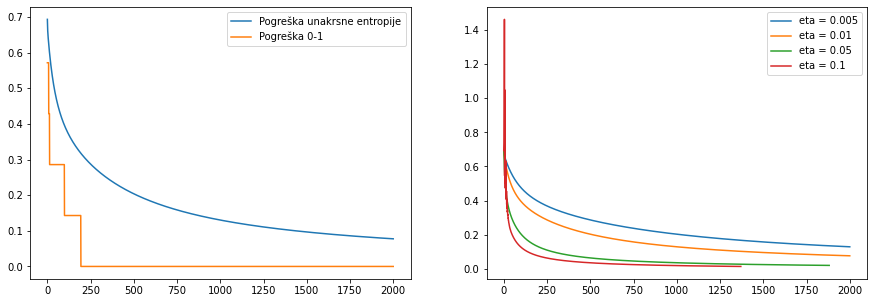

In [613]:
#matrica dizajna
poly = PolynomialFeatures(1)
theta = poly.fit_transform(seven_X)

#procjena za 0-1 pogrešku
prediction = lambda w: np.around(np.array([lr_h(xi, w) for xi in theta]))

#dobivanje težina - treniranje
w = lr_train(seven_X, seven_y, max_iter=2000, epsilon=0.00001, trace=True)

#izračun pogrešaka
zero_one_errors = np.array([zero_one_loss(seven_y, prediction(wi)) for wi in w])

cross__entropy_errors = np.array([cross__entropy_error(theta, seven_y, wi) for wi in w])

#plot pogreške
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].plot(np.arange(0, w.shape[0]), cross__entropy_errors, label= "Pogreška unakrsne entropije")
ax[0].plot(np.arange(0, w.shape[0]), zero_one_errors, label= "Pogreška 0-1")
ax[0].legend(loc="best")

#plot pogreške unakrsne entropije za različite ete
for n in [0.005, 0.01, 0.05, 0.1]:
    w = lr_train(seven_X, seven_y,eta=n, max_iter=2000, epsilon=0.00001, trace=True)
    errors = np.array([cross__entropy_error(theta, seven_y, wi) for wi in w])
  
    ax[1].plot(np.arange(0, w.shape[0]), errors, label= f"eta = {n}")
    ax[1].legend(loc="best")
plt.show()


**Q:** Zašto je pogreška unakrsne entropije veća od pogreške klasifikacije? Je li to uvijek slučaj kod logističke regresije i zašto?

**Q:** Koju stopu učenja $\eta$ biste odabrali i zašto?

### (e)

Upoznajte se s klasom [`linear_model.LogisticRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) koja implementira logističku regresiju. Usporedite rezultat modela na skupu `seven` s rezultatom koji dobivate pomoću vlastite implementacije algoritma.

**NB:** Kako ugrađena implementacija koristi naprednije verzije optimizacije funkcije, vrlo je vjerojatno da Vam se rješenja neće poklapati, ali generalne performanse modela bi trebale. Ponovno, pripazite na broj iteracija i snagu regularizacije.

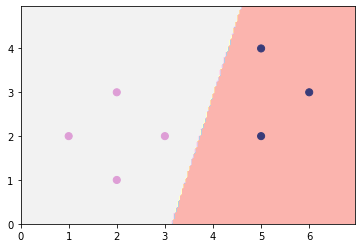

In [614]:
from sklearn.linear_model import LogisticRegression
logisticka_regresija = LogisticRegression(penalty='none', max_iter=2000, tol=0.0001).fit(seven_X, seven_y)
plot_2d_clf_problem(seven_X, seven_y, h=logisticka_regresija.predict)

### 4. Analiza logističke regresije

### (a)

Koristeći ugrađenu implementaciju logističke regresije, provjerite kako se logistička regresija nosi s vrijednostima koje odskaču. Iskoristite skup `outlier`. Prikažite granicu između klasa.

In [615]:
outlier_X = np.append(seven_X, [[12,8]], axis=0)
outlier_y = np.append(seven_y, 0)

Error: iteracija prekinuta u 843 koraku



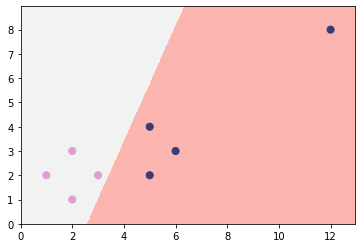

In [623]:
w = lr_train(outlier_X, outlier_y)

def h(X):
    #matrica dizajna
    poly = PolynomialFeatures(1)
    theta = poly.fit_transform(X)
    
    #napravi procjenu za svaki primjer iz theta na osnovu dobivenog w
    y = [lr_h(x, w) for x in theta]

    return np.around(np.array(y))

poly = PolynomialFeatures(1)
theta_1 = poly.fit_transform(outlier_X)

#plot
plot_2d_clf_problem(outlier_X, outlier_y, h=h)

**Q:** Zašto se rezultat razlikuje od onog koji je dobio model klasifikacije linearnom regresijom iz prvog zadatka?

### (b)

Trenirajte model logističke regresije na skupu `seven` te na dva odvojena grafikona prikažite, kroz iteracije optimizacijskoga algoritma, (1) izlaz modela $h(\mathbf{x})$ za svih sedam primjera te (2) vrijednosti težina $w_0$, $w_1$, $w_2$.

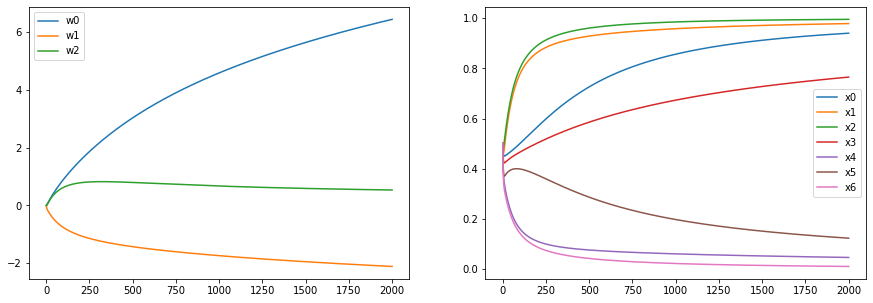

In [647]:
#matrica dizajna
poly = PolynomialFeatures(1)
theta = poly.fit_transform(seven_X)

#dobivanje težina - treniranje na linearno odvojivom skupu podataka seven
w = lr_train(seven_X, seven_y, max_iter=2000, epsilon=0.00001 , trace=True)

#"raspakiravanje"
w0,w1,w2 = [],[],[]
y_predictions = np.empty((seven_X.shape[0], w.shape[0]))

for i,wi in enumerate(w):
  #vrijednosti težina w0,w1,w2
  w0.append(wi[0])
  w1.append(wi[1])
  w2.append(wi[2])
  for j,xi in enumerate(theta):
    #izlaz modela za svih sedam primjera
    y_predictions[j][i] = lr_h(xi, wi)


#plot
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].plot(w0,label= f"w0")
ax[0].plot(w1,label= f"w1")
ax[0].plot(w2,label= f"w2")

for j, val in enumerate(y_predictions):
  ax[1].plot(y_predictions[j], label=f"x{j}")

ax[0].legend(loc="best")
ax[1].legend(loc="best")
plt.show()

### (c)

Ponovite eksperiment iz podzadatka (b) koristeći linearno neodvojiv skup podataka `unsep`.

In [618]:
unsep_X = np.append(seven_X, [[2,2]], axis=0)
unsep_y = np.append(seven_y, 0)

Error: iteracija prekinuta u 1428 koraku



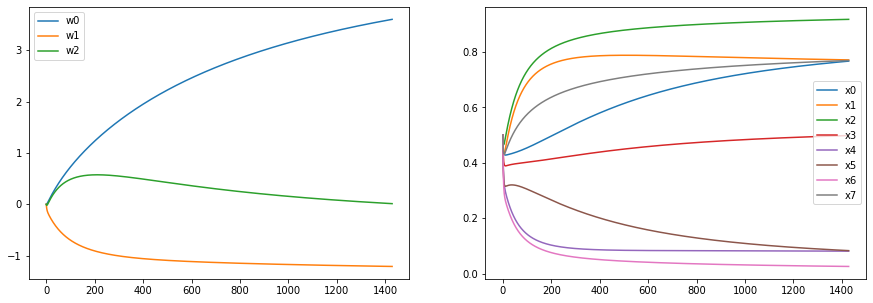

In [657]:
#matrica dizajna
poly = PolynomialFeatures(1)
theta = poly.fit_transform(unsep_X)

#dobivanje težina - treniranje na linearrno nedovojivom skupu
w = lr_train(unsep_X, unsep_y, epsilon=0.00001, max_iter=2000, trace=True)

w0,w1,w2 = [],[],[]
y_predictions = np.empty((unsep_X.shape[0], w.shape[0]))

#"raspakiravanje"
for i,wi in enumerate(w):
  #vrijednosti težina w0,w1,w2
  w0.append(wi[0])
  w1.append(wi[1])
  w2.append(wi[2])
  for j,xi in enumerate(theta):
    #izlaz modela za svih sedam primjera
    y_predictions[j][i] = lr_h(xi, wi)

#plot
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].plot(w0,label= f"w0")
ax[0].plot(w1,label= f"w1")
ax[0].plot(w2,label= f"w2")

for j, val in enumerate(y_predictions):
  ax[1].plot(np.arange(0,w.shape[0]),val, label=f"x{j}")

ax[0].legend(loc="best")
ax[1].legend(loc="best")
plt.show()

**Q:** Usporedite grafikone za slučaj linearno odvojivih i linearno neodvojivih primjera te komentirajte razliku.

### 5. Regularizirana logistička regresija

Trenirajte model logističke regresije na skupu `seven` s različitim faktorima L2-regularizacije, $\alpha\in\{0,1,10,100\}$. Prikažite na dva odvojena grafikona (1) pogrešku unakrsne entropije te (2) L2-normu vektora $\mathbf{w}$ kroz iteracije optimizacijskog algoritma.

In [620]:
from numpy.linalg import norm

Error: iteracija prekinuta u 842 koraku

Error: iteracija prekinuta u 255 koraku



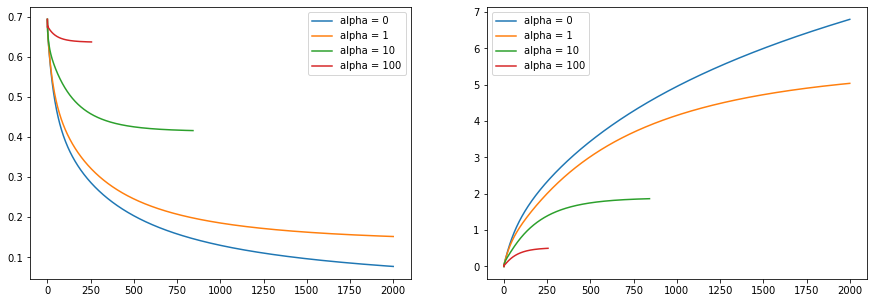

In [629]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

#matrica dizajna
poly = PolynomialFeatures(1)
theta = poly.fit_transform(seven_X)

for alphaa in [0,1,10,100]:
    #treniranje modela s različitim faktorima regularizacije alpha
    w = lr_train(seven_X, seven_y, max_iter=2000, alpha=alphaa, epsilon=0.00001 , trace=True)
    #pogreške unakrsne entropije
    errors = np.array([cross__entropy_error(theta, seven_y, wi) for wi in w])
    #izračun L2-normi
    norms = np.linalg.norm(w, axis=1)
    #plot
    ax[0].plot(np.arange(0,w.shape[0]), errors, label= f"alpha = {alphaa}")
    ax[0].legend(loc="best")
    ax[1].plot(np.arange(0,w.shape[0]), norms, label= f"alpha = {alphaa}")
    ax[1].legend(loc="best")

plt.show()

**Q:** Jesu li izgledi krivulja očekivani i zašto?

**Q:** Koju biste vrijednost za $\alpha$ odabrali i zašto?

### 6. Logistička regresija s funkcijom preslikavanja

Proučite funkciju [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html). Generirajte i prikažite dvoklasan skup podataka s ukupno $N=100$ dvodimenzijskih ($n=2)$ primjera, i to sa dvije grupe po klasi (`n_clusters_per_class=2`). Malo je izgledno da će tako generiran skup biti linearno odvojiv, međutim to nije problem jer primjere možemo preslikati u višedimenzijski prostor značajki pomoću klase [`preprocessing.PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html), kao što smo to učinili kod linearne regresije u prvoj laboratorijskoj vježbi. Trenirajte model logističke regresije koristeći za preslikavanje u prostor značajki polinomijalnu funkciju stupnja $d=2$ i stupnja $d=3$. Prikažite dobivene granice između klasa. Možete koristiti svoju implementaciju, ali se radi brzine preporuča koristiti `linear_model.LogisticRegression`. Regularizacijski faktor odaberite po želji.

**NB:** Kao i ranije, za prikaz granice između klasa koristite funkciju `plot_2d_clf_problem`. Funkciji kao argumente predajte izvorni skup podataka, a preslikavanje u prostor značajki napravite unutar poziva funkcije `h` koja čini predikciju, na sljedeći način:

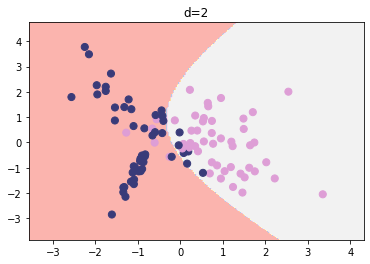

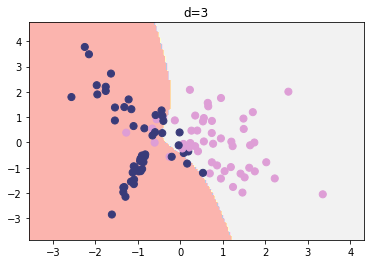

In [630]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.datasets import make_classification

#Generate a random n-class classification problem
X, y = make_classification(100, 2, n_redundant=0, n_classes=2, n_clusters_per_class=2)

for i in [2,3]:
  #preslikavanbje u prostor značaki za d=2 i d=3
  poly = PolynomialFeatures(i)
  poly = poly.fit(X)
  #model
  h = LogisticRegression(C=1.1).fit(poly.transform(X), y)
  #plot
  plot_2d_clf_problem(X, y, h=lambda x : h.predict(poly.transform(x)))
  plt.title(f"d={i}")
  plt.show()

**Q:** Koji biste stupanj polinoma upotrijebili i zašto? Je li taj odabir povezan s odabirom regularizacijskog faktora $\alpha$? Zašto?